# Newton’s method,  steepest descent, conjugate gradient descent

## Newton Method

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return x**3-4*x**2+1
def dev_f(x):
    return 3*x**2-8*x

In [3]:
## find out f(x) = 0,  x?
def newton(f, df, x0, TOL, step):
    xn = x0
    for n in range(0, step):
        fxn = f(xn)
        dfxn = df(xn)
        if dfxn == 0:
            return None
        xn = xn - fxn/dfxn
        if fxn/dfxn < TOL:
            return xn, n
    return "exceeded steps"

        

In [4]:
xn, n = newton(f, dev_f, 1, 0.5e-5, 100)
xn, n

(0.5374015770359705, 3)

In [5]:
f(xn), dev_f(xn)

(-3.6884495457911726e-11, -3.4328112512855196)

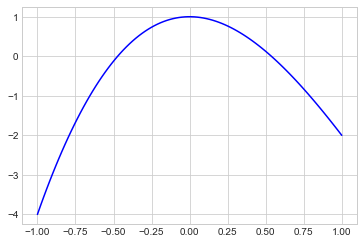

In [6]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
# 100 linearly spaced numbers
x = np.linspace(-1,1,100)

# the function, which is y = x^2 here
y = f(x)

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()

## Steepest Descent

In [7]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import linalg as LA

In [8]:
""" 
x[0] : x
x[1] : y

"""
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

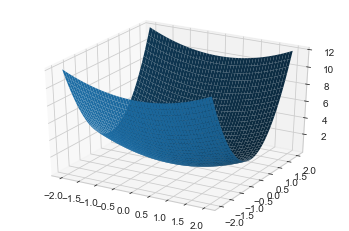

In [9]:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)


In [11]:
#  Steepest Descent:
def steepest_descent(guesses, TOL, step):
    for i in range(0,step):
        x = guesses[-1] # last guess
        delta_v = -df(x) # the direction of the steepest descent
        if LA.norm(df(x)) < TOL:
            return guesses, i
        def f1d(alpha):
            return f(x + alpha*delta_v) # find the 0 of alpha
        s = sopt.golden(f1d) # golden search decide how far to go (alpha)
        next_guess = x + s * delta_v
        guesses.append(next_guess)
    print("exceeded steps")
    return None
    
guesses, step = steepest_descent([np.array([2,2])], 1e-5, 20)
guesses[-5:], step

([array([ 1.99036044e-04, -7.96143963e-06]),
  array([2.65381269e-05, 2.65381345e-05]),
  array([ 2.10620056e-05, -8.42479952e-07]),
  array([2.80826597e-06, 2.80826679e-06]),
  array([ 2.22878253e-06, -8.91512728e-08])],
 13)

In [12]:
f(guesses[0]), df(guesses[-1])

(12.0, array([ 2.22878253e-06, -4.45756364e-07]))

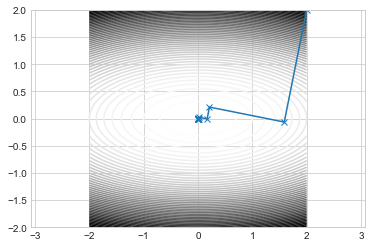

In [13]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")

### For symmetric matrix - Steepest Descent
We will set the derivative to zero to find the minimum:
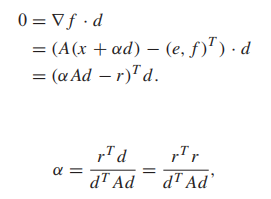

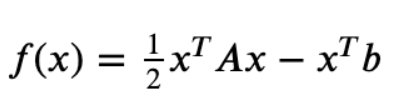

In [14]:
def is_pos_def(x):
    """check if a matrix is symmetric positive definite"""
    return np.all(np.linalg.eigvals(x) > 0)

def steepest_descent(A, b, guesses):
    """
    Solve Ax = b
    Parameter x: initial values
    """
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    x = guesses[-1]
    r = b - np.dot(A, x)
    k = 0
    rold = np.dot(np.transpose(r), r)
    while LA.norm(r) > 1e-5 :
        d = r
        Ad = np.dot(A, d)
        alpha = rold / np.dot(np.transpose(d), Ad) # minimizes
        x = x + np.dot(alpha, d)
        guesses.append(x)
        r = r - np.dot(alpha, Ad)
        rnew = np.dot(np.transpose(r), r)
        rold = rnew
        k =+ 1
    return guesses, k

In [15]:
A=np.array([[2,2],[2,5]])
b=np.array([6,3])
guesses=[np.array([0,0])]


guesses, k = steepest_descent(A, b, guesses)
guesses[-1], k

(array([ 3.99999484, -0.99999871]), 1)

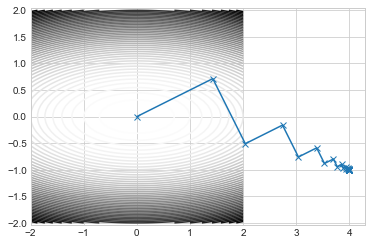

In [16]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")

## Conjugate Gradient Search
Only for symmetric matrix
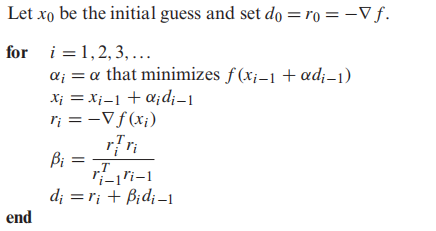

In [17]:
def conjgrad(A, b, guesses):
    """
    A function to solve [A]{x} = {b} linear equation system with the 
    conjugate gradient method.
    More at: http://en.wikipedia.org/wiki/Conjugate_gradient_method
    ========== Parameters ==========
    A : matrix 
        A real symmetric positive definite matrix.
    b : vector
        The right hand side (RHS) vector of the system.
    x : vector
        The starting guess for the solution.
    r here means residual
    d the direction we decide to go
    """  
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    
    
    x = guesses[-1]
    r = b - np.dot(A, x)
    d = r
    rold = np.dot(np.transpose(r), r)
    k = 0
    for i in range(len(b)):
        Ad = np.dot(A, d)
        alpha = rold / np.dot(np.transpose(d), Ad) # minimizes
        x = x + np.dot(alpha, d)
        guesses.append(x)
        r = r - np.dot(alpha, Ad)
        rnew = np.dot(np.transpose(r), r)
        if np.sqrt(rnew) < 1e-5:
            break
        d = r + (rnew/rold)*d  # different from steepest descent
        rold = rnew
        k+=1
    return guesses, k

In [18]:
# define a conjugate matrix A
A=np.array([[2,2],[2,5]])
b=np.array([6,3])
guesses=[np.array([0,0])]
guesses, k = conjgrad(A, b, guesses)
guesses[-1], k

(array([ 4., -1.]), 1)

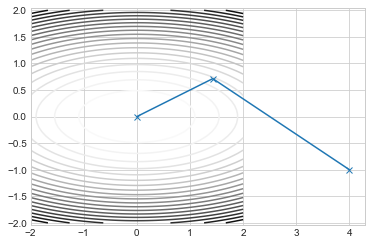

In [19]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 20)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")